In [34]:
import healpy as hp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from healpy.newvisufunc import projview, newprojplot

import astropy
from astropy.coordinates import SkyCoord
from astropy.table import join
import astropy.units as u

import sys
sys.path.insert(0,'../code')
%load_ext autoreload
%autoreload 
import utils
import maps

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['axes.labelsize'] = 22
matplotlib.rcParams['axes.titlesize'] = 24
matplotlib.rcParams['legend.fontsize'] = 18
matplotlib.rcParams["font.family"] = "sans-serif"
# matplotlib.rcParams["font.family"] = "serif"
# matplotlib.rcParams['font.serif'] = "Times New Roman"

matplotlib.rc('text', usetex=True)

In [3]:
name_catalog = '\emph{{Gaia}}-\emph{{unWISE}} Quasar Catalog'
abbrv_catalog = 'Quaia'

name_gall = "\emph{{Gaia}} DR3 Quasar Candidates"
abbrv_gall = "\emph{{Gaia}} DR3 Quasar Candidates"

name_zgaia = "\emph{{Gaia}} redshift" 
abbrv_zgaia = "z_\mathrm{Gaia}"

name_zspz = f"{abbrv_catalog} redshift" 
abbrv_zspz = f"z_\mathrm{{{abbrv_catalog}}}"

In [4]:
cmap_anim = utils.shiftedColorMap(matplotlib.cm.plasma_r, start=0.2, midpoint=0.6, stop=1.0)
cmap_map = 'plasma'
cmap_blues = utils.shiftedColorMap(matplotlib.cm.Blues, start=0.2, midpoint=0.6, stop=1.0)
cmap_hist = utils.shiftedColorMap(matplotlib.cm.inferno_r, start=0.1, midpoint=0.55, stop=1.0)

color_gaia = 'purple'

Functions

In [5]:
def get_ndens_map(ras, decs, NSIDE=64):
    map_nqso, _ = maps.get_map(NSIDE, ras, decs, null_val=0)
    map_ndens = map_nqso/area_per_pixel
    map_ndens_masked = hp.ma(map_ndens)
    map_ndens_masked.mask = map_ndens==0
    return map_ndens_masked

Map settings

In [6]:
NSIDE = 64
area_per_pixel = hp.nside2pixarea(NSIDE, degrees=True)
print(f"Area per pixel: {area_per_pixel:.3f} deg")

Area per pixel: 0.839 deg


In [7]:
G_lo = 20.0
G_hi = 20.5

In [8]:
fn_gcathi = f'../data/catalog_G{G_hi}.fits'
tab_gcathi = utils.load_table(fn_gcathi)
print(len(tab_gcathi))

1295502


## Look into very bright sources ("beasts")

Text(0, 0.5, '$z_\\mathrm{Quaia}$, Quaia redshift')

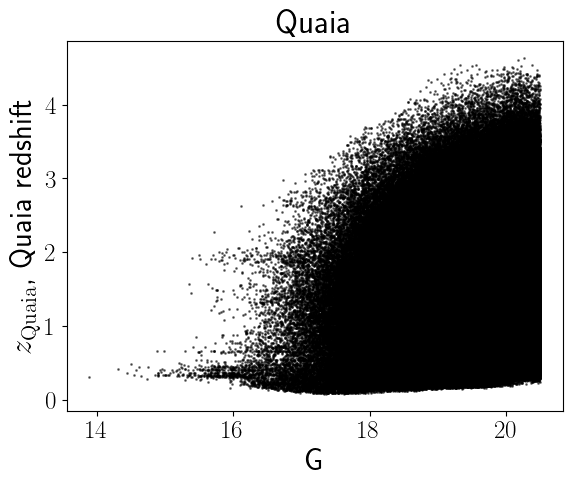

In [22]:
plt.title(abbrv_catalog)
plt.scatter(tab_gcathi['phot_g_mean_mag'], tab_gcathi['redshift_spz'], alpha=0.5, s=1, c='k')
plt.xlabel('G')
plt.ylabel(rf'${abbrv_zspz}$, {name_zspz}')

In [41]:
i_beasts = (tab_gcathi['phot_g_mean_mag'] < 17) & (tab_gcathi['redshift_spz'] > 3.5)
print(np.sum(i_beasts))

0


Text(0, 0.5, '$z_\\mathrm{Gaia}$, \\emph{{Gaia}} redshift')

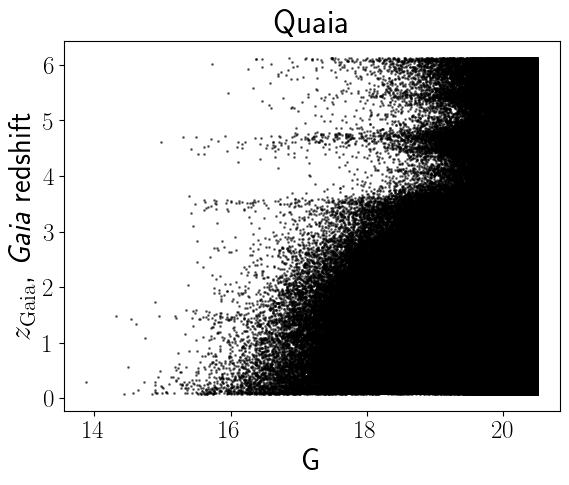

In [43]:
plt.title(abbrv_catalog)
plt.scatter(tab_gcathi['phot_g_mean_mag'], tab_gcathi['redshift_qsoc'], alpha=0.5, s=1, c='k')
plt.xlabel('G')
plt.ylabel(rf'${abbrv_zgaia}$, {name_zgaia}')

In [44]:
i_beasts = (tab_gcathi['phot_g_mean_mag'] < 17) & (tab_gcathi['redshift_qsoc'] > 3.5)
print(np.sum(i_beasts))

121


In [ ]:
i_close = (tab_gcathi['ra'][i_beasts]-c.ra.value < 0.5) & (tab_gcathi['dec'][i_beasts]-c.dec.value < 0.5)


In [57]:
i_close = (np.abs(tab_gcathi['ra'][i_beasts]-c.ra.value) < 5) & \
          (np.abs(tab_gcathi['dec'][i_beasts]-c.dec.value) < 5)
print(np.sum(i_close))

1


Text(0, 0.5, 'dec')

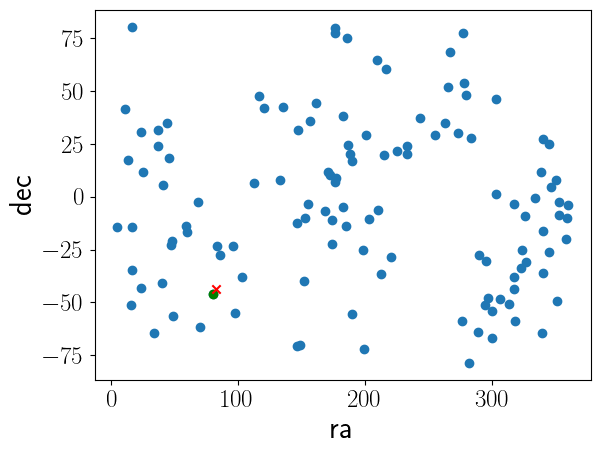

In [58]:
plt.scatter(tab_gcathi['ra'][i_beasts], tab_gcathi['dec'][i_beasts])
plt.scatter(tab_gcathi['ra'][i_beasts][i_close], tab_gcathi['dec'][i_beasts][i_close], color='green')

c = SkyCoord('05h29m', '-43d51m')
plt.scatter(c.ra, c.dec, marker='x', color='red')

plt.xlabel('ra')
plt.ylabel('dec')

In [61]:
tab_gcathi[i_beasts][i_close]

source_id,ra,dec,l,b,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,phot_g_n_obs,phot_bp_n_obs,phot_rp_n_obs,redshift_qsoc,redshift_qsoc_lower,redshift_qsoc_upper,zscore_qsoc,flags_qsoc,pmra,pmra_error,pmdec,pmdec_error,parallax,parallax_error,ebv,A_v,pm,mag_w1_vg,mag_w2_vg,unwise_objid,rand_ints,g_rp,bp_g,bp_rp,g_w1,w1_w2,redshift_spz_raw,redshift_spz_err,redshift_spz
,deg,deg,deg,deg,mag,mag,mag,,,,,,,,,mas / yr,mas / yr,mas / yr,mas / yr,mas,mas,,,mas / yr,,,,,mag,mag,mag,mag,,,,
int64,float64,float64,float64,float64,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,int64,float64,float32,float64,float32,float64,float32,float32,float32,float64,float64,float64,bytes16,int64,float32,float32,float32,float64,float64,float64,float64,float64
4799794011057558016,79.95717977449885,-45.77884814616486,251.59674194333368,-34.6342732477239,16.842937,16.94038,15.76902,353,38,38,4.5364275,4.5344167,4.5384393,0.0,5,0.1395914744168376,0.05411549,-0.041466612138233994,0.06561653,-0.04800244696447191,0.05036131,0.042374138,0.13135983,0.14562025838491485,10.658481,9.702978,0809m455o0010388,638474,1.0739174,0.09744263,1.17136,6.184456469482422,0.9555030000000002,0.4025461971759796,0.38948642238616943,0.4025461971759796


Look at all the quasar candidates

In [10]:
fn_gall = '../data/gaia_candidates_plus.fits.gz'
tab_gall = utils.load_table(fn_gall)
print(len(tab_gall))

6649162


Text(0, 0.5, '$z_\\mathrm{Gaia}$, \\emph{{Gaia}} redshift')

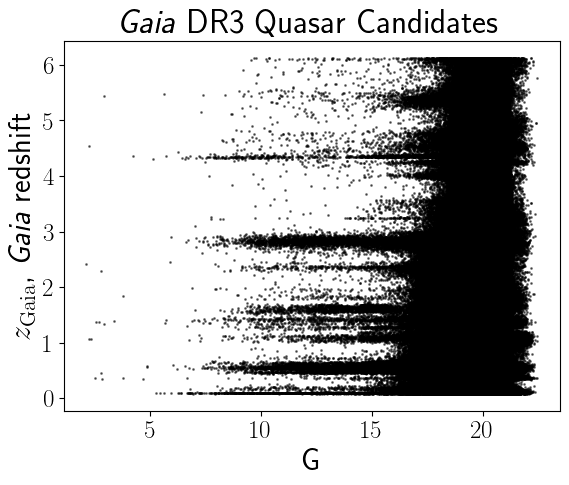

In [26]:
plt.title(abbrv_gall)
plt.scatter(tab_gall['phot_g_mean_mag'], tab_gall['redshift_qsoc'], alpha=0.5, s=1, c='k')
plt.xlabel('G')
plt.ylabel(rf'${abbrv_zgaia}$, {name_zgaia}')

# unWISE systematics maps

In [9]:
fn_unwisemap = f'../data/maps/map_unwise_NSIDE{NSIDE}.npy'
map_unwise = maps.get_unwise_map(NSIDE, fn_map=fn_unwisemap)
map_unwisedens = map_unwise/area_per_pixel

unWISE map already exists, loading from ../data/maps/map_unwise_NSIDE64.npy


In [10]:
fn_unwisescanmap = f'../data/maps/map_unwisescan_NSIDE{NSIDE}.npy'
map_unwisescan = maps.get_unwise_scan_map(NSIDE, fn_map=fn_unwisescanmap)

unWISE scan map already exists, loading from ../data/maps/map_unwisescan_NSIDE64.npy


In [11]:
from astropy.coordinates import Angle
def plot_marker(l, b, **kwargs):
    l = l.to(u.rad) if isinstance(l, u.Quantity) else (l * u.deg).to(u.rad)
    b = b.to(u.rad) if isinstance(b, u.Quantity) else (b * u.deg).to(u.rad)
    theta = Angle((np.pi/2 * u.rad) - b)
    phi = Angle(l)
    hp.newprojplot(theta, phi.wrap_at(np.pi * u.rad), **kwargs)

In [31]:
l_tmc, b_tmc = 303.25, -27
c_tmc = SkyCoord(l_tmc*u.deg, b_tmc*u.deg, frame='galactic')
print(f'"TMC": l,b=({l_tmc},{b_tmc}), \n RA,dec=({c_tmc.icrs.ra.deg:.3f}, {c_tmc.icrs.dec.deg:.3f})')

l_tmc_twin = l_tmc - 180
b_tmc_twin = -b_tmc
c_tmc_twin = SkyCoord(l_tmc_twin*u.deg, b_tmc_twin*u.deg, frame='galactic')
print(f'"TMC" twin: l,b=({l_tmc_twin},{b_tmc_twin}), \n RA,dec=({c_tmc_twin.icrs.ra.deg:.3f}, {c_tmc_twin.icrs.dec.deg:.3f})')

"TMC": l,b=(303.25,-27), 
 RA,dec=(258.571, -89.689)
"TMC" twin: l,b=(123.25,27), 
 RA,dec=(78.571, 89.689)


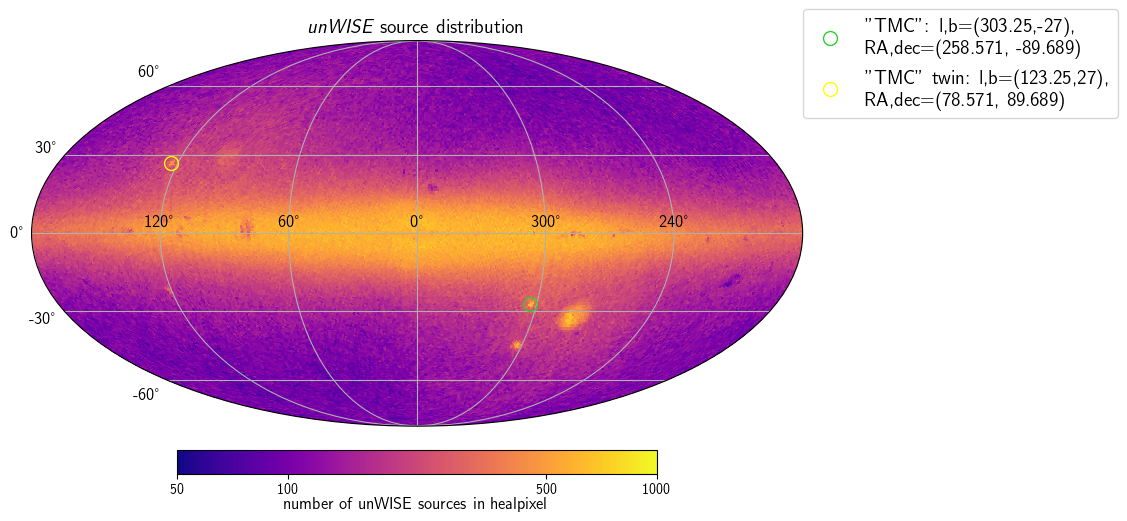

In [29]:
projview(map_unwise, title=rf"\emph{{unWISE}} source distribution",
         unit=r"number of unWISE sources in healpixel", cmap=cmap_map, coord=['C', 'G'], 
         min=50, max=1000, norm='log', cbar_ticks=[50, 100, 500, 1000],
         graticule=True, graticule_labels=True)

plot_marker(l_tmc, b_tmc, color='limegreen', marker='o', ls='None', markerfacecolor='None', markersize=10, 
            label=f'"TMC": l,b=({l_tmc},{b_tmc}), \n RA,dec=({c_tmc.icrs.ra.deg:.3f}, {c_tmc.icrs.dec.deg:.3f})')
plot_marker(l_tmc_twin, b_tmc_twin, color='yellow', marker='o', ls='None', markerfacecolor='None', markersize=10,
            label=f'"TMC" twin: l,b=({l_tmc_twin},{b_tmc_twin}), \n RA,dec=({c_tmc_twin.icrs.ra.deg:.3f}, {c_tmc_twin.icrs.dec.deg:.3f})')
plt.legend(loc=(1.0, 0.8), fontsize=14)

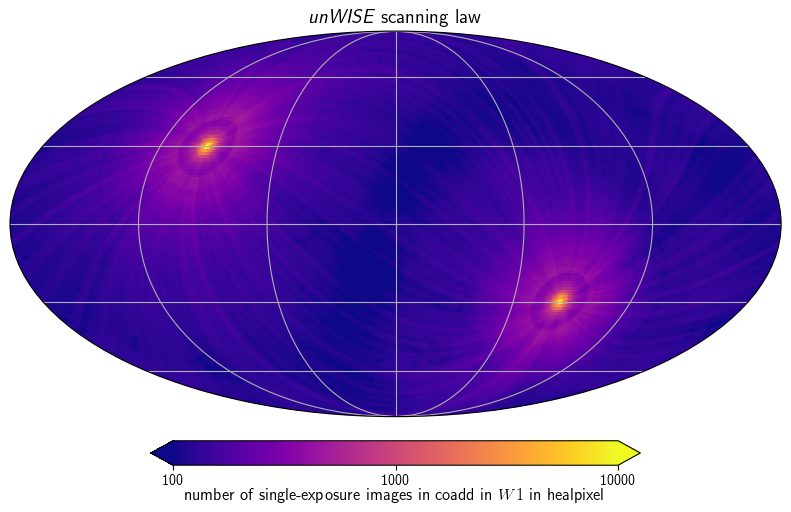

In [21]:
# reverse colormap bc high is worse here
projview(map_unwisescan, title=r"\emph{{unWISE}} scanning law",
         unit=r"number of single-exposure images in coadd in $W1$ in healpixel", cmap=cmap_map, coord=['C', 'G'],
         min=100, max=10000, 
         cbar_ticks=[100, 1000, 10000],
         norm='log',
         graticule=True)

In [9]:
def get_unwise_map(NSIDE=None, fn_map=None, 
                   fn_unwise='../data/unwise_rand0.01_nm_prim.fits.gz',
                   ):
    # data file downloaded from Gaia archive
    # SELECT objID, RAJ2000, DEJ2000, FW1, FW2, nmW1, nmW2
    # FROM "II/363/unwise"
    # WHERE RAND() < 0.01
    # AND FW1>0
    # AND FW2>0
    if fn_map is not None and os.path.exists(fn_map):
        print(f"unWISE map already exists, loading from {fn_map}")
        return np.load(fn_map)
    assert NSIDE is not None, f"{fn_map} doesn't exist; must pass NSIDE to generate!"
    print(f"Generating new unWISE map ({fn_map})")
    tab_unwise = utils.load_table(fn_unwise)
    
    print(len(tab_unwise))
    print(tab_unwise.)
    
    # Take the average over these points, so for a given NSIDE should get exact same map
    map_unwise, _ = get_map(NSIDE, tab_unwise['RAJ2000'], tab_unwise['DEJ2000'], 
                                   func_name='count', null_val=0)
    if fn_map is not None:
        np.save(fn_map, map_unwise)
        print(f"Saved unWISE map to {fn_map}")
    return map_unwise

In [ ]:
map_unwise = get_unwise_map(NSIDE=64)

In [12]:
fn_unwise='../data/unwise_rand0.01_nm_prim.fits.gz'
tab_unwise = utils.load_table(fn_unwise)

In [13]:
tab_unwise.columns

<TableColumns names=('objID','RAJ2000','DEJ2000','FW1','FW2','nmW1','nmW2','Prim','PrimW1','PrimW2')>

In [14]:
set(tab_unwise['Prim'])

{0, 1}

In [15]:
np.sum(tab_unwise['Prim']==1), np.sum(tab_unwise['Prim']==0)

(9798220, 841285)

In [16]:
tab_unwise_prim1 = tab_unwise[tab_unwise['Prim']==1]

In [18]:
map_unwise_prim1, _ = maps.get_map(NSIDE, tab_unwise_prim1['RAJ2000'], tab_unwise_prim1['DEJ2000'], 
                                   func_name='count', null_val=0)

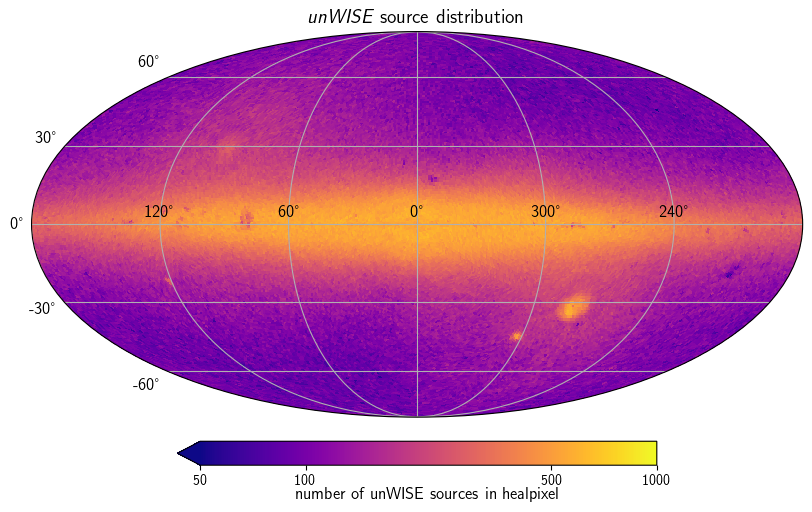

In [19]:
projview(map_unwise_prim1, title=rf"\emph{{unWISE}} source distribution",
         unit=r"number of unWISE sources in healpixel", cmap=cmap_map, coord=['C', 'G'], 
         min=50, max=1000, norm='log', cbar_ticks=[50, 100, 500, 1000],
         graticule=True, graticule_labels=True)

# plot_marker(l_tmc, b_tmc, color='limegreen', marker='o', ls='None', markerfacecolor='None', markersize=10, 
#             label=f'"TMC": l,b=({l_tmc},{b_tmc}), \n RA,dec=({c_tmc.icrs.ra.deg:.3f}, {c_tmc.icrs.dec.deg:.3f})')
# plot_marker(l_tmc_twin, b_tmc_twin, color='yellow', marker='o', ls='None', markerfacecolor='None', markersize=10,
#             label=f'"TMC" twin: l,b=({l_tmc_twin},{b_tmc_twin}), \n RA,dec=({c_tmc_twin.icrs.ra.deg:.3f}, {c_tmc_twin.icrs.dec.deg:.3f})')
# plt.legend(loc=(1.0, 0.8), fontsize=14)

In [25]:
map_unwisescan_prim1, _ = maps.get_map(NSIDE, tab_unwise_prim1['RAJ2000'], tab_unwise_prim1['DEJ2000'], 
                                   func_name='mean', quantity=tab_unwise_prim1['nmW1'], null_val=0)

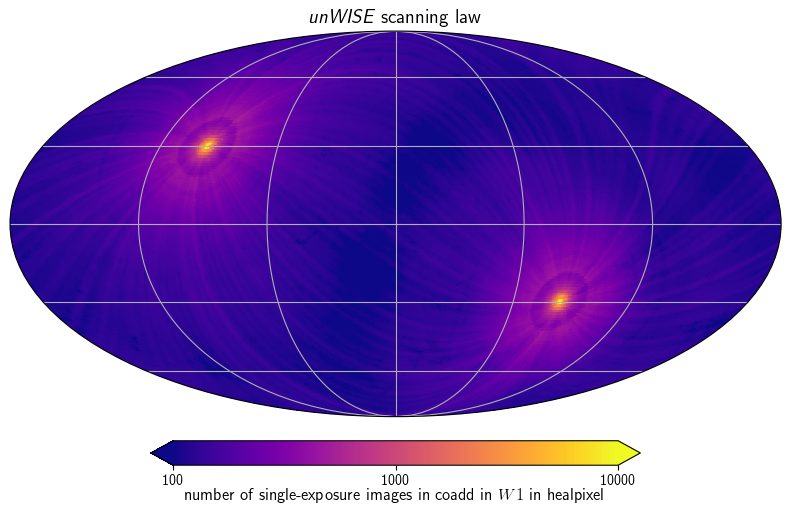

In [26]:
projview(map_unwisescan_prim1, title=r"\emph{{unWISE}} scanning law",
         unit=r"number of single-exposure images in coadd in $W1$ in healpixel", cmap=cmap_map, coord=['C', 'G'],
         min=100, max=10000, 
         cbar_ticks=[100, 1000, 10000],
         norm='log',
         graticule=True)

In [20]:
tab_unwise_prim0 = tab_unwise[tab_unwise['Prim']==0]

In [21]:
map_unwise_prim0, _ = maps.get_map(NSIDE, tab_unwise_prim0['RAJ2000'], tab_unwise_prim0['DEJ2000'], 
                                   func_name='count', null_val=0)

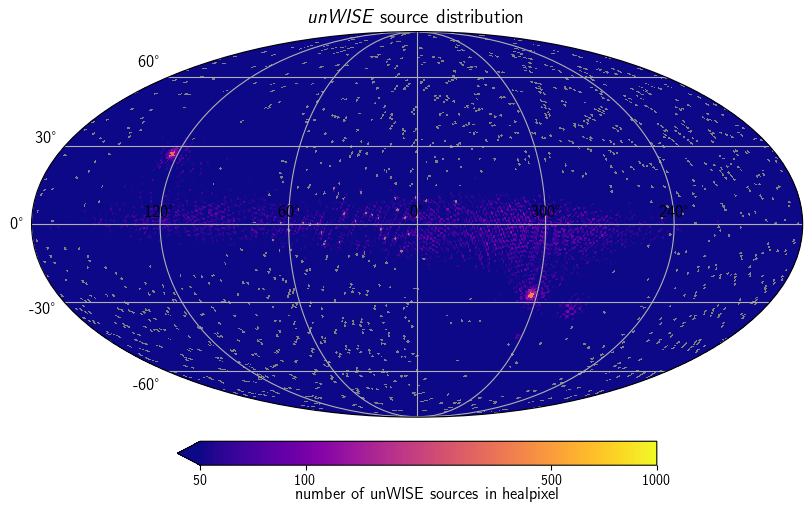

In [22]:
projview(map_unwise_prim0, title=rf"\emph{{unWISE}} source distribution",
         unit=r"number of unWISE sources in healpixel", cmap=cmap_map, coord=['C', 'G'], 
         min=50, max=1000, norm='log', cbar_ticks=[50, 100, 500, 1000],
         graticule=True, graticule_labels=True)

# plot_marker(l_tmc, b_tmc, color='limegreen', marker='o', ls='None', markerfacecolor='None', markersize=10, 
#             label=f'"TMC": l,b=({l_tmc},{b_tmc}), \n RA,dec=({c_tmc.icrs.ra.deg:.3f}, {c_tmc.icrs.dec.deg:.3f})')
# plot_marker(l_tmc_twin, b_tmc_twin, color='yellow', marker='o', ls='None', markerfacecolor='None', markersize=10,
#             label=f'"TMC" twin: l,b=({l_tmc_twin},{b_tmc_twin}), \n RA,dec=({c_tmc_twin.icrs.ra.deg:.3f}, {c_tmc_twin.icrs.dec.deg:.3f})')
# plt.legend(loc=(1.0, 0.8), fontsize=14)

In [35]:
map_mcsunwise = maps.get_mcsunwise_map(NSIDE)

unWISE map already exists, loading from ../data/maps/map_unwise_NSIDE64.npy


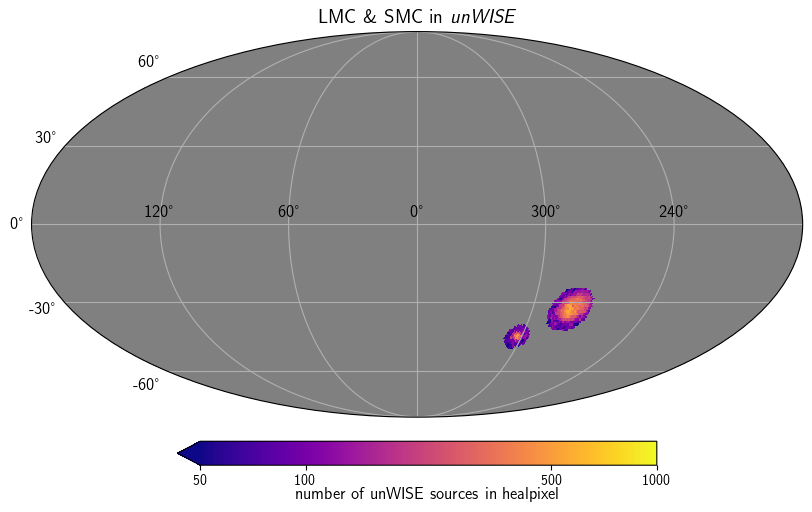

In [36]:
projview(map_mcsunwise, title=rf"LMC \& SMC in \emph{{unWISE}}",
         unit=r"number of unWISE sources in healpixel", cmap=cmap_map, coord=['C', 'G'], 
         min=50, max=1000, norm='log', cbar_ticks=[50, 100, 500, 1000],
         graticule=True, graticule_labels=True)